In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [140]:
date_parse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')

In [141]:
df = pd.read_csv(
    'data/Google_Stock_Price_Train.csv',
    index_col='Date',
    parse_dates=['Date'], # or parse_dates=True,
)

In [142]:
print(
    df.head()
)

              Open    High     Low   Close      Volume
Date                                                  
2012-01-03  325.25  332.83  324.97  663.59   7,380,500
2012-01-04  331.27  333.87  329.08  666.45   5,749,400
2012-01-05  329.83  330.75  326.89  657.21   6,590,300
2012-01-06  328.34  328.77  323.68  648.24   5,405,900
2012-01-09  322.04  322.29  309.46  620.76  11,688,800


Check if any of the data is NOT applicable

In [143]:
print(
    df.isna().any()
)

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool


We can see that the column Close and Volume were not included, because are of non-numeric type!

In [144]:
print(
    df.describe(
    )
)

              Open         High          Low
count  1258.000000  1258.000000  1258.000000
mean    533.709833   537.880223   529.007409
std     151.904442   153.008811   150.552807
min     279.120000   281.210000   277.220000
25%     404.115000   406.765000   401.765000
50%     537.470000   540.750000   532.990000
75%     654.922500   662.587500   644.800000
max     816.680000   816.680000   805.140000


In [145]:
print(
    df.info()
)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB
None


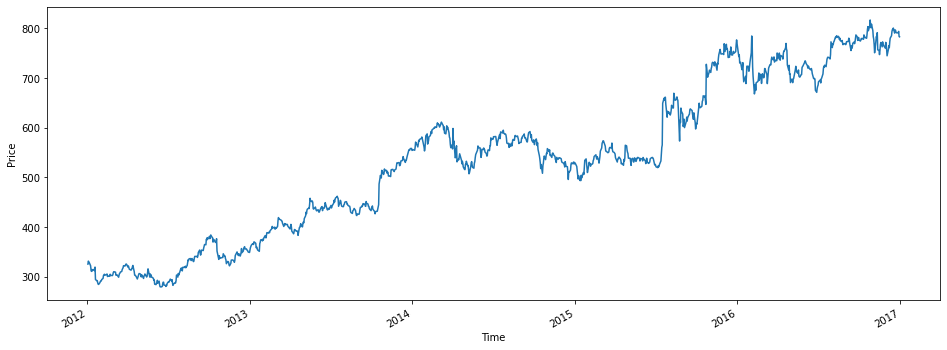

In [146]:
df['Open'].plot(
    figsize=(16, 6)
)
plt.xlabel('Time'), plt.ylabel('Price')
plt.show()

We need to convert the Close and Volume columns to float.

From the error we can conclude, that now the objects are of type string and contain unwanted characters.
Firstly we need to get rid of ',' characters and then convert it to float.

In [147]:
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

# 7 Day Rolling Mean
7 Day Rolling Mean, for every single stock prediction we look 7 days back, collect all the transactions and get the
average for each column. Rolling mean is a moving average from the specified time window=time.

    moving_avg = df.rolling(window=30).mean()

In [148]:
df.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


Plot the rolling mean and the real prices on a single plot

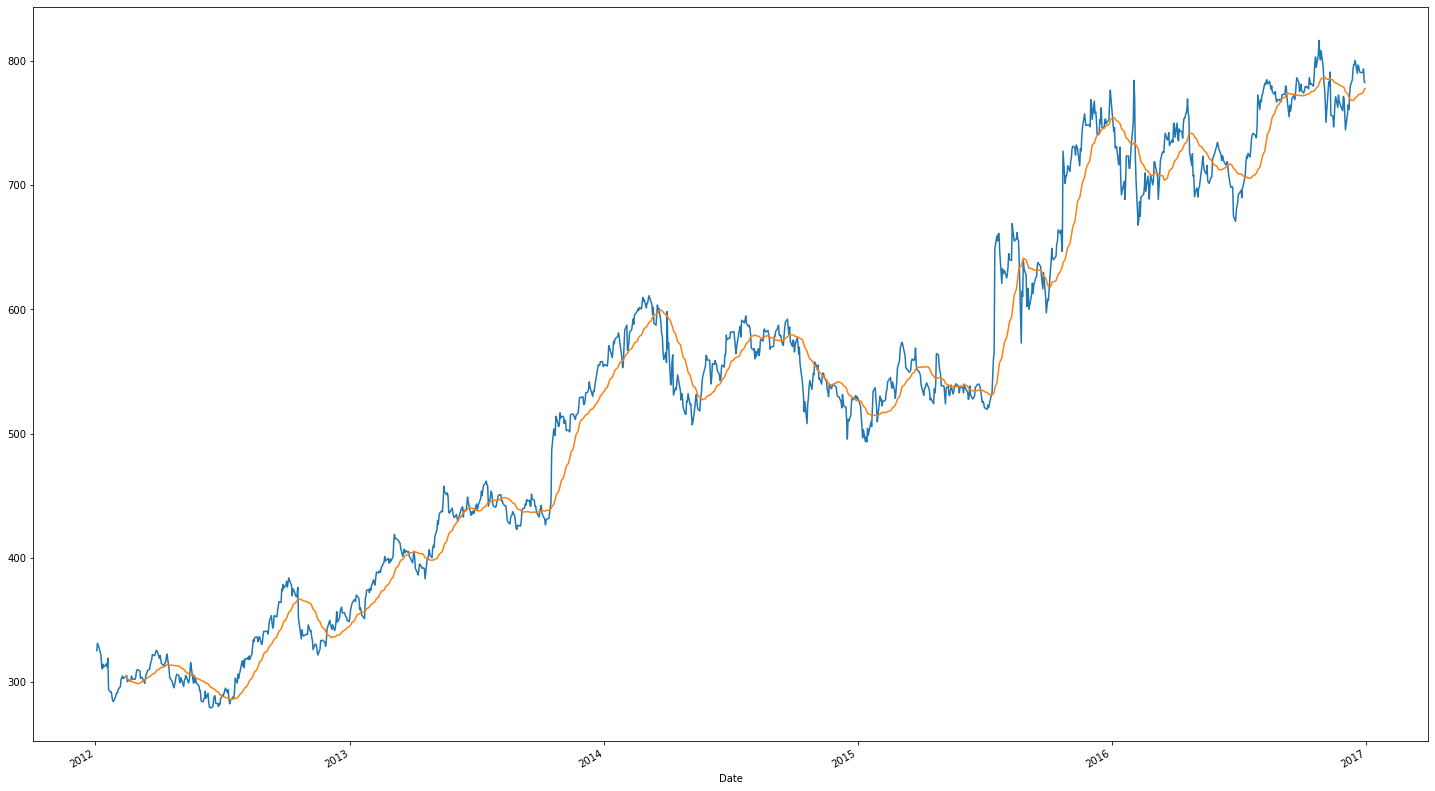

In [159]:
df['Open'].plot(
    figsize=(25,15)
)
df.rolling(30).mean()['Open'].plot()
plt.show()

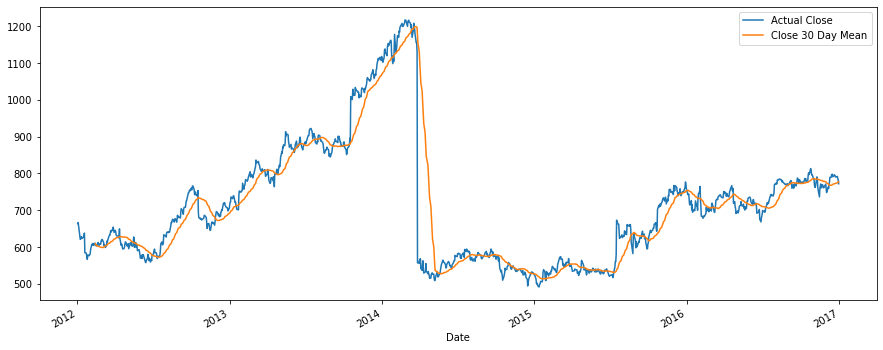

In [167]:
plt.figure(
    figsize=(15, 6)
)
df['Close'].plot(
    label='Actual Close')
df['Close'].rolling(window=30).mean().plot(
    label='Close 30 Day Mean'
)
plt.legend()
plt.show()

Optionally specify a minimum number of periods
expanding(min_periods=1) means, that we want to have 1 observation per window=30

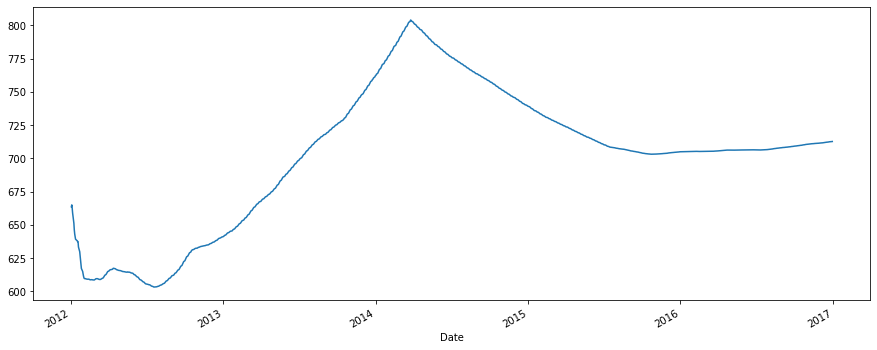

In [173]:
df['Close'].expanding(min_periods=1).mean().plot(
    figsize=(15, 6)
)
plt.show()

In [209]:
X = df['Open']
X = pd.DataFrame(X)
print(X.head())

              Open
Date              
2012-01-03  325.25
2012-01-04  331.27
2012-01-05  329.83
2012-01-06  328.34
2012-01-09  322.04


# Preprocessing Data

In [204]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [212]:
scaler = MinMaxScaler(
    feature_range=(0, 1)
)
X_scaled = scaler.fit_transform(X)
X_train = np.array([])
y_train = np.array([])

In [214]:
for i in range(0, len(X_scaled)):
    np.append(X_train, X_scaled[i-60:i, 0])
    np.append(y_train, X_scaled[i, 0])

